# Example of reading hydro hdf5 files from DSM2
This notebook is an example of using pydsm to read DSM2 h5 output.
The timeseries are loaded as pandas data frame with datetime index and mcolumns of variable type (e.g. flow, stage, ec)
This script is to read DSM2 hdf5 output directly and load it into pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pydsm.io

In [2]:
#%conda install matplotlib
#%load_ext autoreload
#%autoreload 2

In [3]:
filename='../data/output/historical_v82.h5'

# Opening a H5 file

In [4]:
h5f=h5py.File(filename,'r')

# Reading H5 file
A HDF5 file consists of Groups and Datasets. Groups are like dicts with keys and values and Datasets are like arrays with some slicing abilities.

In [5]:
list(h5f.keys())
list(h5f.get('hydro').keys())
list(h5f.get('hydro').get('input').keys())
bf=h5f.get('hydro').get('input').get('boundary_flow')
pd.DataFrame(bf[:])


,name,node,sign,fillin,file,path
0,b'calaveras',21,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RCAL009/FLOW//1DAY/DWR-DMS-201707/'
1,b'cosumnes',446,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RCSM075/FLOW//1DAY/DWR-DMS-201707/'
2,b'moke',447,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RMKL070/FLOW//1DAY/DWR-DMS-201707/'
3,b'north_bay',273,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/SLBAR002/FLOW-EXPORT//1DAY/DWR-DM...
4,b'sac',330,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAC155/FLOW//1DAY/DWR-DMS-201707/'
5,b'vernalis',17,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAN112/FLOW//1DAY/DWR-DMS-201707/'
6,b'yolo',316,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/BYOLO040/FLOW//1DAY/DWR-DMS-201707/'


In [6]:
filename='../data/output/historical_v82.h5'
input_tables=pydsm.io.list_groups_as_df(filename, '/hydro/input')
for table in input_tables[0]:
    path='/hydro/input/'+str(table)
    print(path)
    display(pydsm.io.read_table_as_df(filename, path))

/hydro/input/boundary_flow


,name,node,sign,fillin,file,path
0,calaveras,21,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RCAL009/FLOW//1DAY/DWR-DMS-201707/
1,cosumnes,446,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RCSM075/FLOW//1DAY/DWR-DMS-201707/
2,moke,447,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RMKL070/FLOW//1DAY/DWR-DMS-201707/
3,north_bay,273,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/SLBAR002/FLOW-EXPORT//1DAY/DWR-DMS-...
4,sac,330,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RSAC155/FLOW//1DAY/DWR-DMS-201707/
5,vernalis,17,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RSAN112/FLOW//1DAY/DWR-DMS-201707/
6,yolo,316,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/BYOLO040/FLOW//1DAY/DWR-DMS-201707/


/hydro/input/boundary_stage


,name,node,fillin,file,path
0,mtz,361,linear,../../timeseries/hist0717.dss,/FILL+CHAN/RSAC054/STAGE//15MIN/DWR-DMS-201707...


/hydro/input/channel


,chan_no,length,manning,dispersion,upnode,downnode
0,1,19500,0.035,360.0,1,2
1,2,14000,0.028,360.0,2,3
2,3,13000,0.028,360.0,3,4
3,4,14050,0.028,360.0,4,5
4,5,12350,0.028,360.0,5,6
5,6,9878,0.028,360.0,6,7
6,7,8796,0.028,360.0,7,8
7,8,11625,0.03,360.0,8,9
8,9,10497,0.03,360.0,9,10
9,10,9400,0.03,360.0,10,11


/hydro/input/channel_ic


,chan_no,distance,stage,flow
0,1,0,10.0,2600.0
1,1,length,9.5,2400.0
2,2,0,9.5,2400.0
3,2,length,9.0,2200.0
4,3,0,8.5,2200.0
5,3,length,8.0,2000.0
6,4,0,8.0,2000.0
7,4,length,7.5,1800.0
8,5,0,7.5,1800.0
9,5,length,7.0,1600.0


/hydro/input/envvar


,name,value
0,BNDRYINPUT,../../timeseries/hist0717.dss
1,CLIMATE,../../timeseries/climate-5years.dss
2,DICUFILE,../../timeseries/DCD_Sep2016.dss
3,DICUFILE-ECS,../../timeseries/dicu_2017.dss
4,DICUFILE_ECE,../../timeseries/dicuwq_3vals_extended.dss
5,DICUFILE_ECS,../../timeseries/dicuwq_3vals_extended.dss
6,DSM2AGENCY,dwr
7,DSM2INPUTDIR,../../common_input
8,DSM2MODIFIER,historical_v82
9,DSM2OUTPUTDIR,./output


/hydro/input/gate


,name,from_obj,from_identifier,to_node
0,7_mile@3_mile,channel,308,240
1,7_mile@sjr,channel,307,41
2,FalseBarrier,channel,279,44
3,clifton_court,reservoir,clifton_court,72
4,delta_cross_channel,channel,365,342
5,goodyear_sl,channel,473,367
6,grant_line_barrier,channel,206,172
7,middle_r_barrier,channel,134,112
8,montezuma_salinity_control,channel,512,418
9,morrow_c_line_outfall,channel,542,365


/hydro/input/gate_pipe_device


,gate_name,device,nduplicate,radius,elev,cf_from_node,cf_to_node,default_op
0,7_mile@3_mile,pipes,2,2.0,-4.595,0.5,0.5,gate_open
1,7_mile@sjr,pipes,1,2.0,-4.628,0.0,0.0,gate_close
2,goodyear_sl,pipes,4,2.0,-0.408,0.4,0.4,unidir_to_node
3,grant_line_barrier,pipes,6,2.0,-4.187,0.6,0.6,unidir_from_node
4,middle_r_barrier,pipes,6,2.0,-1.733,0.6,0.6,unidir_to_node
5,morrow_c_line_outfall,pipes,2,1.5,0.059,0.5,0.5,unidir_to_node
6,morrow_m_line_outfall,pipes,3,2.0,-2.321,0.5,0.5,unidir_to_node
7,morrow_sys_intake,pipes,3,2.0,-2.598,0.2,0.2,unidir_from_node
8,old_r@head_barrier,pipes,8,2.0,-5.674,0.6,0.6,gate_open
9,old_r@tracy_barrier,pipes,9,2.0,-3.641,0.6,0.6,unidir_from_node


/hydro/input/gate_weir_device


,gate_name,device,nduplicate,width,elev,height,cf_from_node,cf_to_node,default_op
0,FalseBarrier,barrier,1,950.0,20.0,9999.0,0.65,0.65,gate_open
1,clifton_court,reservoir_gates,5,20.0,-7.748,9999.0,1.0,1.0,unidir_from_node
2,delta_cross_channel,cross_channel_gates,2,60.0,-11.218,9999.0,2.0,2.0,gate_open
3,grant_line_barrier,barrier,1,180.0,3.313,9999.0,0.8,0.8,gate_open
4,middle_r_barrier,barrier,1,140.0,3.267,9999.0,0.7,0.7,gate_open
5,montezuma_salinity_control,boat_lock,1,20.0,-7.51,9999.0,0.8,0.8,gate_close
6,montezuma_salinity_control,flashboards,1,66.0,-17.01,9999.0,1.0,1.0,gate_close
7,montezuma_salinity_control,modified_flashboard,1,40.0,-8.51,1.0,0.6,0.6,gate_close
8,montezuma_salinity_control,radial_gates,3,36.0,-22.51,9999.0,1.0,1.0,gate_open
9,old_r@head_barrier,fall_barrier,1,32.0,2.326,9999.0,0.7,0.7,gate_open


/hydro/input/input_gate


,gate_name,device,variable,fillin,file,path


/hydro/input/input_transfer_flow


,transfer_name,fillin,file,path


/hydro/input/io_file


,model,type,io,interval,file
0,hydro,echo,out,none,./output/hydro_echo_historical_v82.inp
1,hydro,hdf5,out,30min,./output/historical_v82.h5
2,hydro,output,out,none,./output/historical_v82.hof
3,hydro,restart,out,1mon,./output/historical_v82.hrf


/hydro/input/layers


,number,name
0,0,.\historical_hydro.inp
1,1,configuration_historical.inp
2,2,../../common_input/channel_std_delta_grid_navd...
3,3,../../common_input/reservoir_std_delta_grid_na...
4,4,../../common_input/gate_std_delta_grid_2016050...
5,5,../../common_input/channel_ic_std_delta_grid_n...
6,6,../../common_input/reservoir_ic_std_delta_grid...
7,7,../../common_input/boundary_flow_delta_histori...
8,8,../../common_input/source_flow_delta_historica...
9,9,../../common_input/boundary_stage_delta_histor...


/hydro/input/operating_rule


,name,action,trigger
0,FalseBarrier_in,SET gate_install(gate=FalseBarrier) TO 1.0,DATETIME >= 28MAY2015 AND DATETIME <= 01OCT2015
1,FalseBarrier_out,SET gate_install(gate=FalseBarrier) TO 0.0,DATETIME < 28MAY2015 OR DATETIME > 01OCT2015
2,clfct_gate_op,"SET gate_op(gate=clifton_court,device=reservoi...",TRUE
3,dcc_gate_op,"SET gate_op(gate=delta_cross_channel,device=cr...",TRUE
4,glc_barrier_elev,"SET gate_elev(gate=grant_line_barrier, device=...",TRUE
5,glc_barrier_width,"SET gate_width(gate=grant_line_barrier, device...",TRUE
6,glc_install_in,SET gate_install(gate=grant_line_barrier) TO 1.0,ts(name=glc_install) >= 1.0
7,glc_install_out,SET gate_install(gate=grant_line_barrier) TO 0.0,ts(name=glc_install) <= 0.0
8,glc_pipe_op_down,"SET gate_op(gate=grant_line_barrier,device=pip...",TRUE
9,mid_barrier_elev,"SET gate_elev(gate=middle_r_barrier, device=ba...",TRUE


/hydro/input/oprule_expression


,name,definition
0,mscs_calc,ts(name=mscs_op) < 0
1,mscs_dhopen,"(chan_stage(channel=512,dist=6038) - chan_stag..."
2,mscs_velclose,"chan_vel(channel=513,dist=0) < -0.1"


/hydro/input/oprule_time_series


,name,fillin,file,path
0,clfct_op,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/CHWST000/POS//IR-YEAR/DWR-OM-JOC-DSM2/
1,dcc_op,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/RSAC128/POS//IR-YEAR/DWR-DMS-DSM2/
2,glc_elev,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/GL_CN/WEIRELEVATION//IR-DECADE/DWR-...
3,glc_install,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/GL_CN/INSTALL//IR-DECADE/DWR-BDO/
4,glc_pipeopdown,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/GL_CN/PIPE_OP_DOWN//IR-DECADE/DWR-BDO/
5,glc_width,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/GL_CN/WEIRWIDTH//IR-DECADE/DWR-BDO/
6,mid_elev,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/MID_R/WEIRELEVATION//IR-DECADE/DWR-...
7,midr_install,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/MID_R/INSTALL//IR-DECADE/DWR-BDO/
8,midr_pipeopdown,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/MID_R/PIPE_OP_DOWN//IR-DECADE/DWR-BDO/
9,mscs_fract,last,../../timeseries/gates-v8-201707.dss,/HIST+GATE/MTZSL/RADIAL_FRACT//IR-DECADE/DWR-ESO/


/hydro/input/output_channel


,name,chan_no,distance,variable,interval,period_op,file
0,CHAN134,134,3814,flow,15MIN,inst,./output/historical_v82.dss
1,CHAN134,134,3814,stage,15MIN,inst,./output/historical_v82.dss
2,CHAN212,212,0,flow,15MIN,inst,./output/historical_v82.dss
3,CHAN212,212,0,stage,15MIN,inst,./output/historical_v82.dss
4,CHAN392,392,0,flow,15MIN,inst,./output/historical_v82.dss
5,CHAN392,392,0,stage,15MIN,inst,./output/historical_v82.dss
6,CHAN59,59,2381,flow,15MIN,inst,./output/historical_v82.dss
7,CHAN59,59,2381,stage,15MIN,inst,./output/historical_v82.dss
8,CHAN70,70,1993,flow,15MIN,inst,./output/historical_v82.dss
9,CHAN70,70,1993,stage,15MIN,inst,./output/historical_v82.dss


/hydro/input/output_gate


,name,gate_name,device,variable,interval,period_op,file


/hydro/input/output_reservoir


,name,res_name,node,variable,interval,period_op,file
0,clifton_court,clifton_court,72,flow,15MIN,inst,./output/historical_v82.dss
1,clifton_court,clifton_court,none,stage,15MIN,inst,./output/historical_v82.dss


/hydro/input/reservoir


,name,area,bot_elev
0,bethel,15.5031,-5.741
1,clifton_court,91.868,-7.748
2,discovery_bay,19.632,-13.654
3,franks_tract,141.7864,-7.754
4,liberty,226.904,-7.652
5,mildred,42.2996,-11.823


/hydro/input/reservoir_connection


,res_name,node,coef_in,coef_out
0,bethel,220,1500.0,1500.0
1,discovery_bay,197,1125.0,0.0
2,discovery_bay,198,1125.0,1125.0
3,franks_tract,103,2250.0,2250.0
4,franks_tract,216,1500.0,1500.0
5,franks_tract,219,1500.0,1500.0
6,franks_tract,224,2250.0,2250.0
7,franks_tract,225,1500.0,1500.0
8,franks_tract,232,2250.0,2250.0
9,liberty,322,7500.0,5625.0


/hydro/input/reservoir_ic


,res_name,stage
0,bethel,5.0
1,clifton_court,5.0
2,discovery_bay,5.0
3,franks_tract,5.0
4,liberty,7.0
5,mildred,5.0


/hydro/input/reservoir_vol


,res_name,elev,area,volume


/hydro/input/scalar


,name,value
0,binary_output,false
1,checkdata,false
2,cont_bad,false
3,cont_missing,true
4,cont_question,true
5,cont_unchecked,true
6,deltax,5000
7,display_intvl,1day
8,dss_direct,true
9,flush_output,20day


/hydro/input/source_flow


,name,node,sign,fillin,file,path
0,ccc,206,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/CHCCC006/FLOW-DIVERSION//1DAY/DWR-D...
1,cccoldr,80,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/ROLD034/FLOW-EXPORT//1DAY/DWR-DMS-2...
2,ccw,191,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/CHVCT001/FLOW-EXPORT//1DAY/DWR-DMS-...
3,cvp,181,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/CHDMC004/FLOW-EXPORT//1DAY/DWR-DMS-...
4,dicu_div_1,1,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+NODE/1/DIV-FLOW//1DAY/DWR-BDO/
5,dicu_div_10,10,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+NODE/10/DIV-FLOW//1DAY/DWR-BDO/
6,dicu_div_100,100,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+NODE/100/DIV-FLOW//1DAY/DWR-BDO/
7,dicu_div_104,104,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+NODE/104/DIV-FLOW//1DAY/DWR-BDO/
8,dicu_div_105,105,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+NODE/105/DIV-FLOW//1DAY/DWR-BDO/
9,dicu_div_106,106,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+NODE/106/DIV-FLOW//1DAY/DWR-BDO/


/hydro/input/source_flow_reservoir


,name,res_name,sign,fillin,file,path
0,dicu_div_bbid,clifton_court,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+RSVR/BBID/DIV-FLOW//1DAY/DWR-BDO/
1,dicu_drain_bbid,clifton_court,1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+RSVR/BBID/DRAIN-FLOW//1DAY/DWR-BDO/
2,dicu_seep_bbid,clifton_court,-1,last,../../timeseries/DCD_Sep2016.dss,/DICU-HIST+RSVR/BBID/SEEP-FLOW//1DAY/DWR-BDO/
3,swp,clifton_court,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/CHSWP003/FLOW-EXPORT//1DAY/DWR-DMS-...


/hydro/input/transfer


,name,from_obj,from_identifier,to_obj,to_identifier


/hydro/input/xsect


,chan_no,dist,file


/hydro/input/xsect_layer


,chan_no,dist,elev,area,width,wet_perim
0,1,0.24,4.225,0.0,0.0,0.0
1,1,0.24,5.995,103.6,116.4,116.5
2,1,0.24,27.715,10088.4,803.1,805.2
3,1,0.24,35.345,16724.9,936.8,939.9
4,1,0.24,38.475,19710.7,970.3,973.6
5,1,0.953,2.509,0.0,0.0,0.0
6,1,0.953,4.199,213.7,253.3,253.5
7,1,0.953,18.789,4592.7,346.7,351.5
8,1,0.953,24.449,7426.6,655.2,660.8
9,1,0.953,35.649,15192.5,731.5,740.3


In [7]:
print(h5f.get('/input'))

None


# Hydro data file structure
DSM2 Hydro HDF5 stores data under three groups:
 * /hydro/data
 * /hydro/input
 * /hydro/geometry
 
The next cell prints out the tables available under each

In [8]:
group_paths=['/hydro/input','/hydro/data','/hydro/geometry']
for path in group_paths:
    print(path)
    for key in h5f.get(path).keys():
        print('    ',key)

/hydro/input
     boundary_flow
     boundary_stage
     channel
     channel_ic
     envvar
     gate
     gate_pipe_device
     gate_weir_device
     input_gate
     input_transfer_flow
     io_file
     layers
     operating_rule
     oprule_expression
     oprule_time_series
     output_channel
     output_gate
     output_reservoir
     reservoir
     reservoir_connection
     reservoir_ic
     reservoir_vol
     scalar
     source_flow
     source_flow_reservoir
     transfer
     xsect
     xsect_layer
/hydro/data
     channel area
     channel avg area
     channel flow
     channel stage
     qext flow
     reservoir flow
     reservoir height
     transfer flow
/hydro/geometry
     channel_bottom
     channel_location
     channel_number
     external_flow_names
     hydro_comp_point
     node_flow_connections
     qext
     reservoir_flow_connections
     reservoir_names
     reservoir_node_connect
     stage_boundaries
     transfer_names


# Channel indices to numbers
The data in DataSets under /hydro/data is typically indexed by time, channel index, upstream/downstream if needed
The channel index can be mapped to the channel number by looking up that information from /hydro/geometry/channel_number

In [9]:
channel_numbers=pd.DataFrame(h5f.get('/hydro/geometry/channel_number')[:])
#print(channel_numbers)
channel_index2number=channel_numbers[0].to_dict()
index=157
print('This channel number for index:',index, ' should be 169. It is ',channel_index2number[index])
channel_number2index= {value: key for key, value in channel_index2number.items()}
print('This channel index for number:', 169, ' should be ',index,'. It is ',channel_number2index[169])


This channel number for index: 157  should be 169. It is  169
This channel index for number: 169  should be  157 . It is  157


In [10]:
channel_location=pd.DataFrame(h5f.get('/hydro/geometry/channel_location')[:],dtype=np.str)
display(channel_location)


,0
0,upstream
1,downstream


# Extracting data
Extracting data can then be done using the channel numbers. All data arrays have the first axis as time. The time start and time interval is available in the attrs along with other meta data.

Flow data shape is *time* x *channel index* x *channel location*

time start is available in attribue "START_TIME"
channel index to channel numbers is explained above
channel location (upstream/downstream) is available in /hydro/geometry/channel_location

In [11]:
channel_location[0].str.upper()

0      UPSTREAM
1    DOWNSTREAM
Name: 0, dtype: object

In [12]:
flowdata = h5f.get('/hydro/data/channel flow')
print(flowdata.shape)
#
interval_string=flowdata.attrs['interval'][0].decode('UTF-8')
model=flowdata.attrs['model'][0].decode('UTF-8')
model_version=flowdata.attrs['model_version'][0].decode('UTF-8')
start_time=pd.to_datetime(flowdata.attrs['start_time'][0].decode('UTF-8'))
print('Start time: ',start_time)
print('time interval: ',interval_string)
print('Model: ',model)
print('Model Version: ',model_version)
#
print('Slicing along time for channel number: 441')
channel_id=441
location='UPSTREAM'
channel_index= channel_number2index[channel_id]# channel_numbers[channel_numbers[0]==441] #-- slow way
location_index=channel_location[channel_location[0].str.upper()==location]
darr=flowdata[:,channel_index,location_index]
ts441=pd.DataFrame(darr,
                   columns=[str(channel_id)+'-'+location],
                   index=pd.date_range(start_time,freq='30T',periods=darr.shape[0]),dtype=np.float32)

(4177, 521, 2)
Start time:  1990-01-02 00:00:00
time interval:  30min
Model:  Hydro
Model Version:  8.2
Slicing along time for channel number: 441


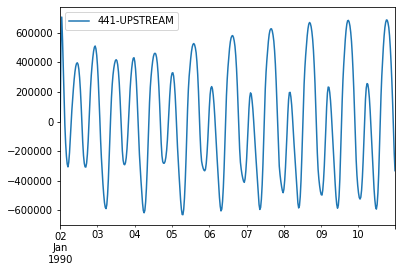

In [13]:
ts441['01jan1990':'10jan1990'].plot()

In [14]:
for key in flowdata.attrs.keys(): print (key, flowdata.attrs[key])

CLASS [b'TIMESERIES']
DIMENSION_LABELS [b'channel_number' b'channel_number' b'time']
DIMENSION_LIST [array([<HDF5 object reference>, <HDF5 object reference>], dtype=object)
 array([], dtype=object) array([], dtype=object)]
interval [b'30min']
model [b'Hydro']
model_version [b'8.2']
start_time [b'1990-01-02 00:00:00']


In [15]:
import pydsm.io

In [16]:
#pd.DataFrame()
pd.DataFrame(h5f['/hydro/input/boundary_flow'][:],dtype=np.str)

,name,node,sign,fillin,file,path
0,calaveras,21,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RCAL009/FLOW//1DAY/DWR-DMS-201707/
1,cosumnes,446,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RCSM075/FLOW//1DAY/DWR-DMS-201707/
2,moke,447,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RMKL070/FLOW//1DAY/DWR-DMS-201707/
3,north_bay,273,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/SLBAR002/FLOW-EXPORT//1DAY/DWR-DMS-...
4,sac,330,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RSAC155/FLOW//1DAY/DWR-DMS-201707/
5,vernalis,17,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RSAN112/FLOW//1DAY/DWR-DMS-201707/
6,yolo,316,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/BYOLO040/FLOW//1DAY/DWR-DMS-201707/


In [17]:
import pydsm.io
filename='../data/output/historical_v82.h5'
x=pydsm.io.read_table_as_df(filename,'/hydro/input/boundary_flow')
display(x)


,name,node,sign,fillin,file,path
0,calaveras,21,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RCAL009/FLOW//1DAY/DWR-DMS-201707/
1,cosumnes,446,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RCSM075/FLOW//1DAY/DWR-DMS-201707/
2,moke,447,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RMKL070/FLOW//1DAY/DWR-DMS-201707/
3,north_bay,273,-1,last,../../timeseries/hist0717.dss,/FILL+CHAN/SLBAR002/FLOW-EXPORT//1DAY/DWR-DMS-...
4,sac,330,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RSAC155/FLOW//1DAY/DWR-DMS-201707/
5,vernalis,17,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/RSAN112/FLOW//1DAY/DWR-DMS-201707/
6,yolo,316,1,last,../../timeseries/hist0717.dss,/FILL+CHAN/BYOLO040/FLOW//1DAY/DWR-DMS-201707/


In [18]:
cb=pydsm.io.read_table_as_df(filename,'/hydro/geometry/channel_bottom')
display(cb)
print('Channel Bottom for Channel Number: ',441)
print(cb[channel_number2index[441]])

,0,1,2,3,4,5,6,7,8,9,...,511,512,513,514,515,516,517,518,519,520
0,3.502402,2.509,-1.5088058,-4.334,-5.233,-4.291078,-8.331375,-10.903,-7.5439568,-8.892461,...,-41.006,-16.633,-3.4955595,-4.41,-4.156,-4.596,-10.672,-16.3335,-11.8615,-0.31
1,2.509,-1.5088058,-1.844,-5.247,-4.291078,-8.331375,-11.9,-7.5439568,-8.892461,-8.513715,...,-22.57,-20.937,-4.967,-3.4955595,-10.189,-7.519,-11.144672,-10.672,-16.3335,-11.8615


Channel Bottom for Channel Number:  441
0    -69.571
1    -52.325
Name: 420, dtype: object


In [19]:
f5=h5py.File(filename,'r')
catable=f5['/hydro/data/channel area']

In [20]:
pydsm.io.read_table_attr(filename,'/hydro/data/channel area' )

,Name,Value
0,CLASS,[b'TIMESERIES']
1,DIMENSION_LABELS,"[b'channel_number', b'channel_number', b'time']"
2,DIMENSION_LIST,"[[<HDF5 object reference>, <HDF5 object refere..."
3,interval,[b'30min']
4,model,[b'Hydro']
5,model_version,[b'8.2']
6,start_time,[b'1990-01-02 00:00:00']
7,shape,"(4177, 521, 2)"


In [21]:
caa=pydsm.io.read_table_attr(filename,'/hydro/data/channel area')
table_metadata=pydsm.io.df_to_dict(caa)
display(table_metadata)
pd.to_timedelta(table_metadata['interval'].astype(str)[0])
pd.to_datetime(table_metadata['start_time'].astype(str)[0])


{'CLASS': array([b'TIMESERIES'], dtype='|S10'),
 'DIMENSION_LABELS': array([b'channel_number', b'channel_number', b'time'], dtype=object),
 'DIMENSION_LIST': array([array([<HDF5 object reference>, <HDF5 object reference>], dtype=object),
        array([], dtype=object), array([], dtype=object)], dtype=object),
 'interval': array([b'30min'], dtype='|S5'),
 'model': array([b'Hydro'], dtype='|S5'),
 'model_version': array([b'8.2'], dtype='|S3'),
 'start_time': array([b'1990-01-02 00:00:00'], dtype='|S19'),
 'shape': '(4177, 521, 2)'}

Timestamp('1990-01-02 00:00:00')

In [22]:
class TableMetaData:
    pass
tmd=TableMetaData()
tmd.table_name='/hydro/data/channel area'
tmd.interval=pd.to_timedelta('30min')
tmd.start_time=pd.to_datetime('1990-01-02 00:00:00')
tmd.dimension_labels=table_metadata['DIMENSION_LABELS'].astype('str')
from ast import literal_eval as make_tuple
tmd.shape=make_tuple(table_metadata['shape'])
print(tmd.shape)


(4177, 521, 2)


In [23]:
s=pydsm.io._convert_time_to_table_slice("01jan1980","01jan1991",tmd.interval,tmd.start_time,tmd.shape[0])
print(s)
x=catable[s,[501,502],0]
#pydsm.io.read_table_as_df(filename,"/hydro/data/channel area",s)

slice(0, 4177, 1)


In [24]:
bf=pd.DataFrame(data=np.array(x), index=pd.DatetimeIndex(data=pd.date_range(start=tmd.start_time+tmd.interval,freq=tmd.interval,periods=s.stop)))

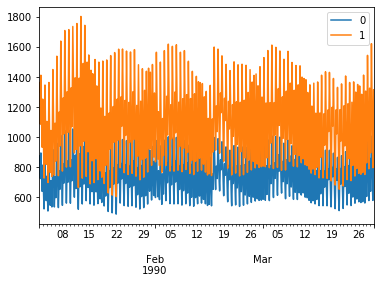

In [25]:
bf.plot()

In [26]:
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/external_flow_names'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/hydro_comp_point'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/node_flow_connections'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/qext'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/reservoir_flow_connections'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/reservoir_names'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/reservoir_node_connect'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/stage_boundaries'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/transfer_names'))


,0
0,calaveras
1,cosumnes
2,moke
3,north_bay
4,sac
5,vernalis
6,yolo
7,ccc
8,cccoldr
9,ccw


,comp_index,channel,distance
0,1,1,0.0
1,2,1,6500.0
2,3,1,13000.0
3,4,1,19500.0
4,5,2,0.0
5,6,2,7000.0
6,7,2,14000.0
7,8,3,0.0
8,9,3,6500.0
9,10,3,13000.0


,connection_index,int_node_no,ext_node_no,node_flow_index,flow_index,flow_name,flow_type
0,1,1,1,1,12,dicu_div_1,qext
1,2,1,1,2,269,dicu_drain_1,qext
2,3,1,1,3,526,dicu_seep_1,qext
3,4,3,3,1,165,dicu_div_3,qext
4,5,3,3,2,422,dicu_drain_3,qext
5,6,3,3,3,679,dicu_seep_3,qext
6,7,5,5,1,225,dicu_div_5,qext
7,8,5,5,2,482,dicu_drain_5,qext
8,9,5,5,3,739,dicu_seep_5,qext
9,10,6,6,1,235,dicu_div_6,qext


,name,attach_obj_name,attached_obj_type,attached_obj_no
0,calaveras,21,2,20
1,cosumnes,446,2,428
2,moke,447,2,429
3,north_bay,273,2,402
4,sac,330,2,295
5,vernalis,17,2,393
6,yolo,316,2,285
7,ccc,206,2,400
8,cccoldr,80,2,79
9,ccw,191,2,178


,connection_index,res_name,res_index,res_flow_index,flow_index,flow_name,flow_type
0,1,clifton_court,2,1,787,dicu_div_bbid,qext
1,2,clifton_court,2,2,788,dicu_drain_bbid,qext
2,3,clifton_court,2,3,789,dicu_seep_bbid,qext
3,4,clifton_court,2,4,790,swp,qext


,0
0,bethel
1,clifton_court
2,discovery_bay
3,franks_tract
4,liberty
5,mildred


,res_node_index,res_name,res_index,connect_index,node_no,ext_node_no,connection_type
0,1,bethel,1,1,203,220,node
1,2,clifton_court,2,1,71,72,gate
2,3,discovery_bay,3,1,183,197,node
3,4,discovery_bay,3,2,184,198,node
4,5,franks_tract,4,1,98,103,node
5,6,franks_tract,4,2,199,216,node
6,7,franks_tract,4,3,202,219,node
7,8,franks_tract,4,4,207,224,node
8,9,franks_tract,4,5,208,225,node
9,10,franks_tract,4,6,212,232,node


,name,int_node_no,ext_node_no
0,mtz,412,361


,0
0,
